----- First rows -----
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

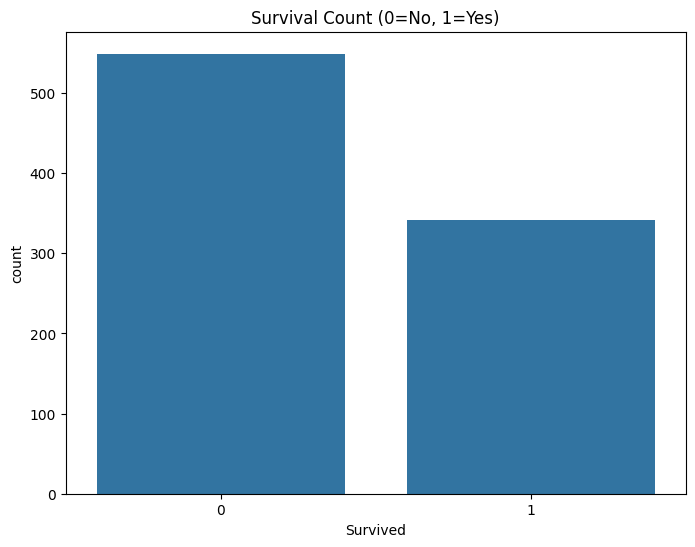

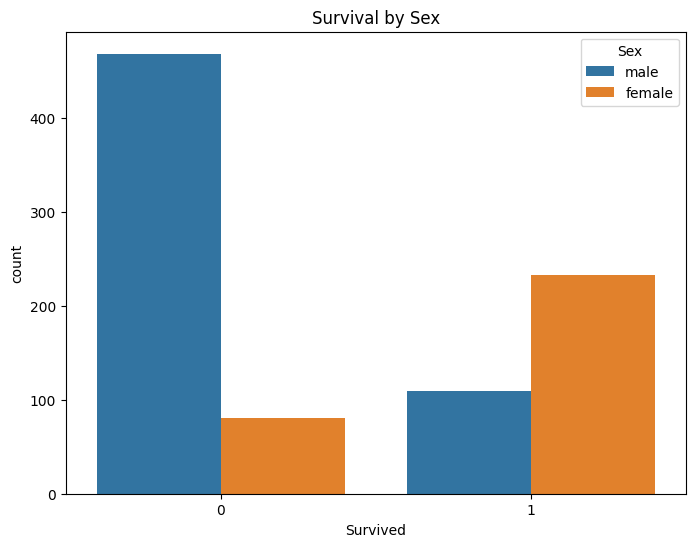

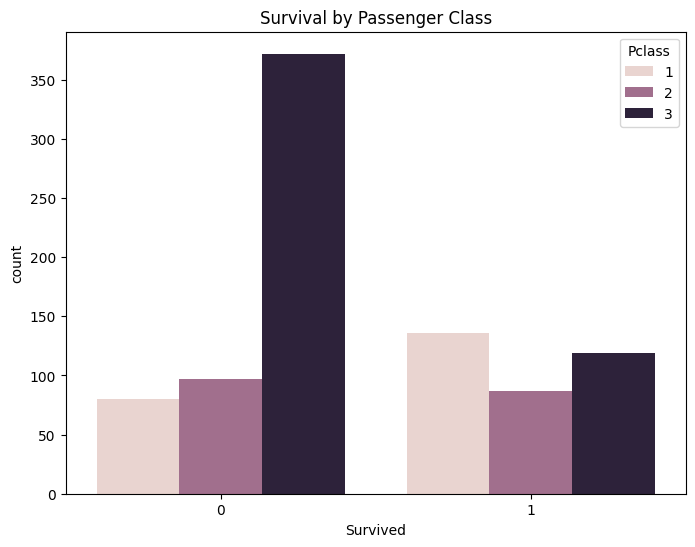

/tmp/ipython-input-376755271.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/tmp/ipython-input-376755271.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


----- Cleaned dataset preview -----
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



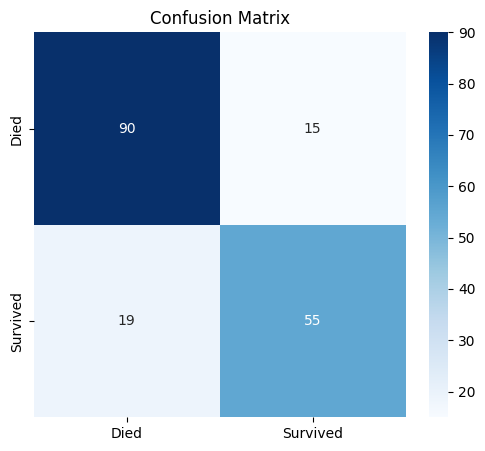

In [1]:
# Day 7 Project - Titanic Survival Prediction

# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

print("----- First rows -----")
print(data.head())
print("\n----- Info -----")
print(data.info())
print("\n----- Missing values -----")
print(data.isnull().sum())

# 2. Basic EDA
plt.figure(figsize=(8,6))
sns.countplot(x="Survived", data=data)
plt.title("Survival Count (0=No, 1=Yes)")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x="Survived", hue="Sex", data=data)
plt.title("Survival by Sex")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x="Survived", hue="Pclass", data=data)
plt.title("Survival by Passenger Class")
plt.show()

# 3. Data Cleaning
# Fill missing Age with median
data["Age"].fillna(data["Age"].median(), inplace=True)
# Fill missing Embarked with most common
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
# Drop Cabin (too many missing values)
data.drop(columns=["Cabin"], inplace=True)

# Convert categorical → numeric
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

# Drop irrelevant columns
data.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)

print("\n----- Cleaned dataset preview -----")
print(data.head())

# 4. Features & Target
X = data.drop("Survived", axis=1)
y = data["Survived"]

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died","Survived"], yticklabels=["Died","Survived"])
plt.title("Confusion Matrix")
plt.show()
